In [51]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

In [3]:
lena = Image.open('pil/test.jpg')
print(lena)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=225x225 at 0x23DD0BA4940>


In [4]:
lena.save('./pil/lena.bmp','bmp')
lena.save('./pil/lena.png','png')
lena.save('./pil/lena.gif','gif')

In [6]:
lena_arr = np.array(lena)
lena_arr

array([[[226, 137, 119],
        [225, 136, 118],
        [225, 136, 118],
        ...,
        [222, 129, 111],
        [237, 146, 125],
        [222, 131, 110]],

       [[225, 136, 118],
        [225, 136, 118],
        [224, 135, 117],
        ...,
        [224, 132, 117],
        [240, 151, 135],
        [222, 134, 122]],

       [[225, 136, 118],
        [224, 135, 117],
        [226, 135, 116],
        ...,
        [203, 114, 108],
        [207, 119, 117],
        [189, 104, 111]],

       ...,

       [[ 86,  26,  64],
        [ 94,  32,  69],
        [ 94,  26,  63],
        ...,
        [122,  46,  72],
        [135,  53,  76],
        [150,  56,  74]],

       [[ 86,  26,  62],
        [ 94,  32,  69],
        [ 93,  25,  62],
        ...,
        [131,  53,  77],
        [146,  61,  82],
        [161,  63,  78]],

       [[ 83,  24,  56],
        [ 92,  31,  64],
        [ 96,  28,  65],
        ...,
        [152,  69,  89],
        [160,  69,  86],
        [176,  74,  88]]

In [7]:
lena_arr.shape

(225, 225, 3)

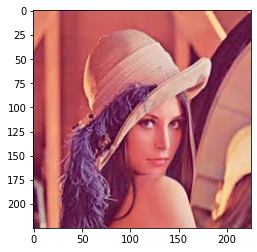

In [16]:
plt.imshow(lena_arr)

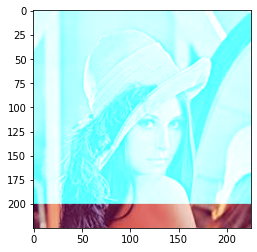

In [27]:
lena_green = lena_arr.copy()

lena_green[:200,:,1] = 255
lena_green[:200,:,2] = 255
plt.imshow(lena_green)

In [18]:
lena_green.shape

(225, 225, 3)

In [28]:
img = Image.fromarray(lena_green)

In [30]:
print(img)

<PIL.Image.Image image mode=RGB size=225x225 at 0x23DE1F41D00>


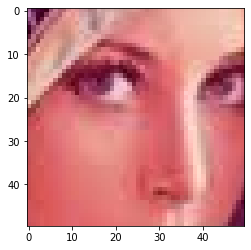

In [59]:
lena = Image.open('pil/test.jpg')
lena_arr = np.array(lena)

im_trim = lena_arr[100:150, 100:150]
plt.imshow(im_trim)

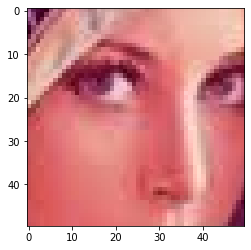

In [32]:
im_crop = lena.crop(box=(100,100,150,150))
plt.imshow(im_crop)

In [72]:
type(np.array(lena))

numpy.ndarray

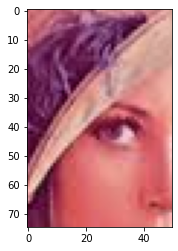

In [33]:
img_width, img_height = lena.size
crop_width, crop_height = 50, 75
lena_crop = lena.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                          (img_width + crop_width) // 2,
                          (img_height + crop_height) // 2))
plt.imshow(lena_crop)

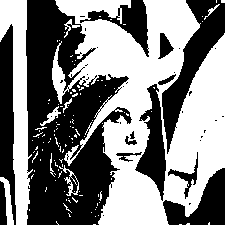

In [37]:
lena_g = lena.convert('L')
lena_g.point(lambda x: 0 if x < 128 else 255)

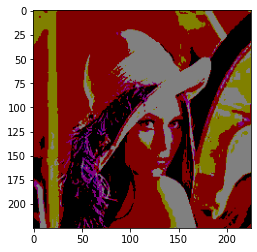

In [42]:
lena_ = lena_arr // 128 * 128
plt.imshow(lena_)


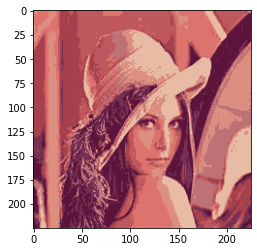

In [48]:
lena_q = lena.quantize(8)
plt.imshow(lena_q)

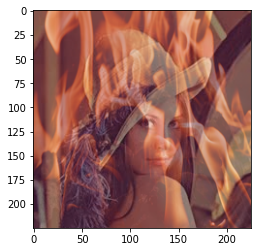

In [49]:
back=Image.open('pil/test2.jpg')
result = Image.blend(lena, back.resize(lena.size), alpha=0.5)
plt.imshow(result)

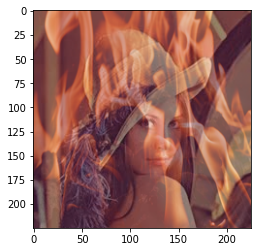

In [50]:
blend = np.array(lena) * 0.5 + np.array(back.resize(lena.size)) * 0.5
plt.imshow(np.uint8(blend))

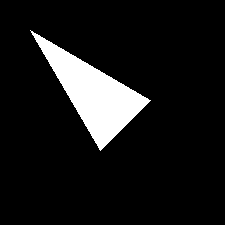

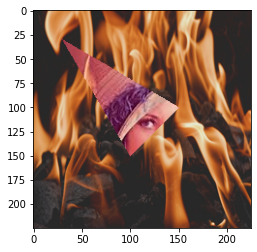

In [57]:
back = Image.open('./pil/test2.jpg').resize(lena.size)
mask = Image.new('L', lena.size, 0)
draw = ImageDraw.Draw(mask)
#draw.ellipse((100, 100, 150, 150), fill = 255)
draw.polygon(((100, 150), (150, 100), (30, 30)), fill = 255)

result = Image.composite(lena, back, mask)
plt.imshow(result)
mask